In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

ar1 = np.array([1, -0.2, -0.6])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)

In [ ]:
# Raw data
new_data = np.cumsum(simulated_data_1)

In [ ]:
# Import dataset and set date to index
candy = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/candy_production.csv', parse_dates=['date'], index_col='date')
candy.head()

,IPG3113N
date,
1972-01-01,85.598809
1972-02-01,71.741404
1972-03-01,65.948809
1972-04-01,64.490724
1972-05-01,64.933842


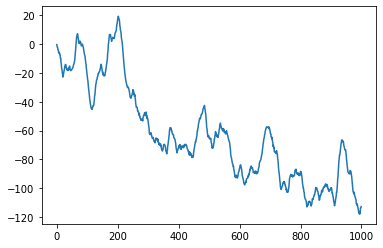

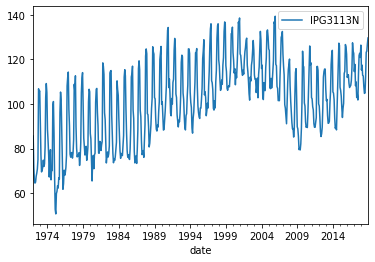

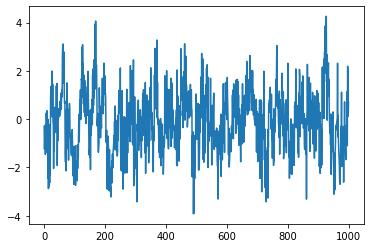

In [ ]:
plt.plot(new_data)
plt.show();

candy.plot()
plt.show();

plt.plot(simulated_data_1)
plt.show();

In [ ]:
adfuller(new_data), adfuller(candy), adfuller(simulated_data_1)

((-1.9592930890632951,
  0.30470177430874834,
  2,
  997,
  {'1%': -3.4369259442540416,
   '5%': -2.8644432969122833,
   '10%': -2.5683158550174094},
  2697.4824215202716),
 (-1.7760153075016094,
  0.39243275007140066,
  14,
  549,
  {'1%': -3.4423174665535385,
   '5%': -2.866818952732754,
   '10%': -2.569581505602171},
  3094.828881317046),
 (-8.538874590120237,
  9.90721310611212e-14,
  6,
  993,
  {'1%': -3.4369525024039884,
   '5%': -2.8644550095200705,
   '10%': -2.568322093455802},
  2698.4924472381945))

All time series should first be checked with the Dickey-Fuller's test.

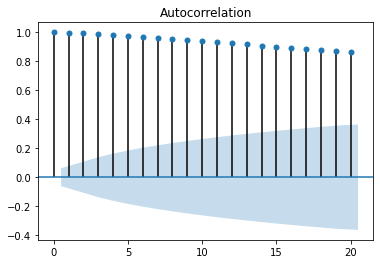

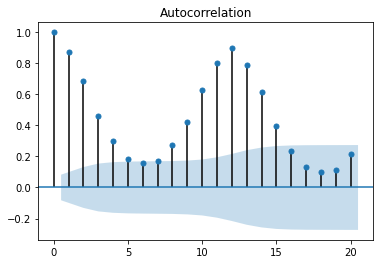

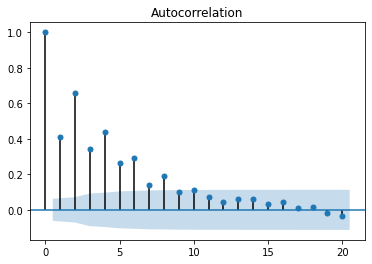

In [ ]:
plot_acf(new_data, lags=20)
plt.show();

plot_acf(candy, lags=20)
plt.show();

plot_acf(simulated_data_1, lags=20)
plt.show();

While non-seasonal time series produces a ACF curve which does not tail off fast, seasonal time series produces one that is periodic, and stationary time series produces curves with quick tailing off. The cycle/period of seasonal time series are obtained from the ACF curve.

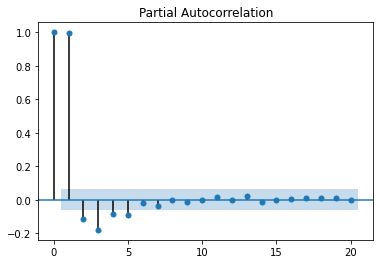

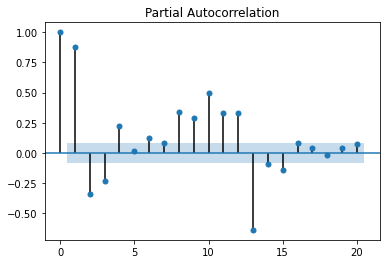

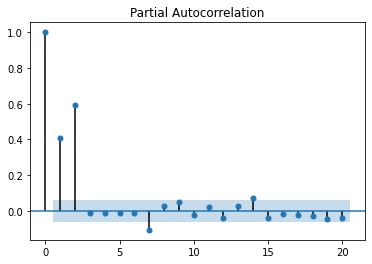

In [ ]:
plot_pacf(new_data, lags=20)
plt.show();

plot_pacf(candy, lags=20)
plt.show();

plot_pacf(simulated_data_1, lags=20)
plt.show();

The non-seasonal PACF curve show high values at the first lag with other significant values at other lags, the seasonal PACF show period curve with a good amount of significant values, while the stationary PACF show a curve where 95% and over is not significant.

In [ ]:
new_data_index = pd.date_range(start=candy.index[0], periods=1000)

In [ ]:
my_data = pd.DataFrame(new_data, columns=['data'], index=new_data_index)
my_data.head()

,data
1972-01-01,-0.301022
1972-01-02,-1.545823
1972-01-03,-2.277535
1972-01-04,-2.531297
1972-01-05,-3.993598


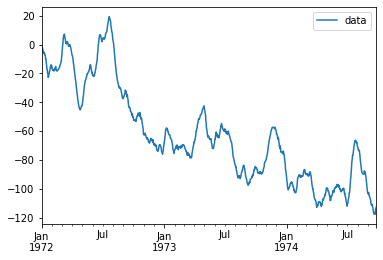

In [ ]:
my_data.plot()
plt.show();

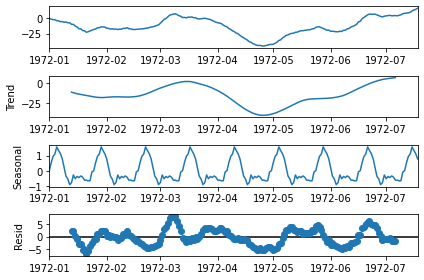

In [ ]:
seasonal_decompose(my_data.iloc[0:200,], period=24).plot()
plt.show();

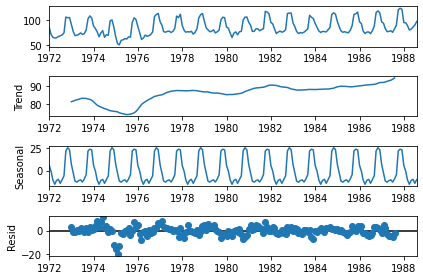

In [ ]:
seasonal_decompose(candy.iloc[0:200,], period=24).plot()
plt.show();

When we decompose a non-seasonal data, the trend curve is not significantly different from the original curve for a sizeable range of test value for the period.

For a seasonal curve on the other hand, the trend curve changes at some period to curves significantly different.

When it is difficult to tell if a curve is seasonal, plotting just the ACF might not make things clear. We need first to detrend the curve using the formular:

df = df - df.rolling(N).mean()
df = df.dropna()

We can now plot the df to see if it is seasonal.

We experiment with 2 examples.

In [ ]:
# Import dataset and set date to index
water = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/water.txt', engine='python', sep=' ', parse_dates=['date'], index_col='date')
water.dropna(axis=1, inplace=True)
water.columns = ['water_consumers']
water.head()

,water_consumers
date,
1983-01-01,24963
1983-02-01,27380
1983-03-01,32588
1983-04-01,25511
1983-05-01,32313


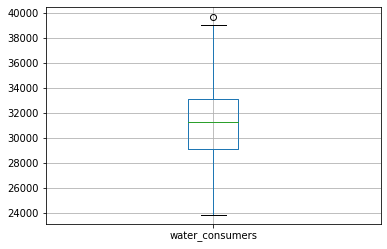

In [ ]:
# Create a plot
water.boxplot()
plt.show();

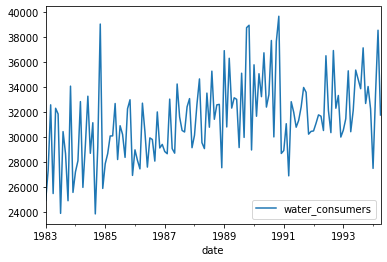

In [ ]:
water.plot()
plt.show();

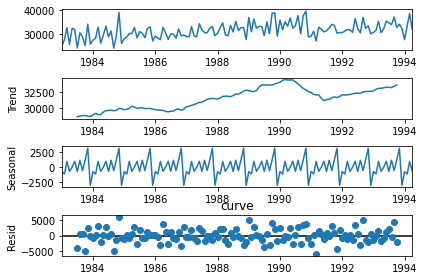

In [ ]:
seasonal_decompose(water, period=12).plot() # changing the period changes the curves produced.
plt.title('curve')
plt.show();

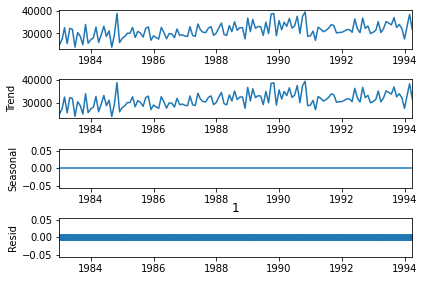

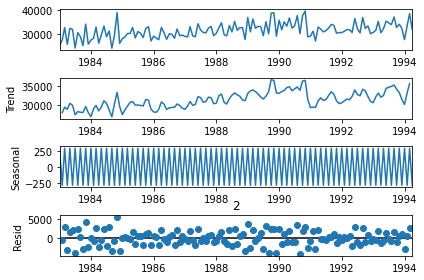

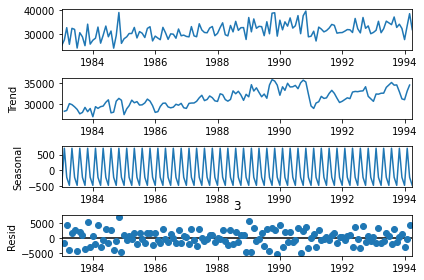

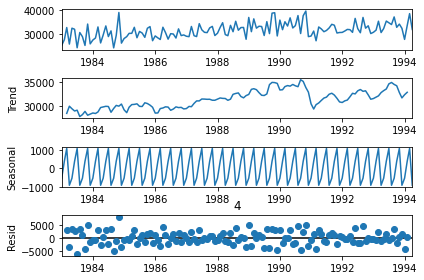

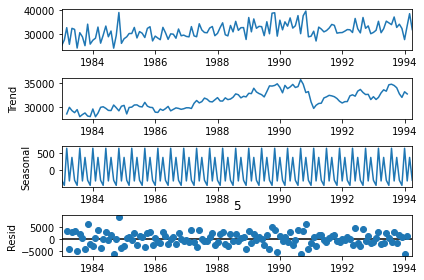

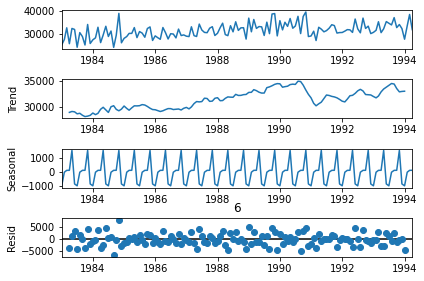

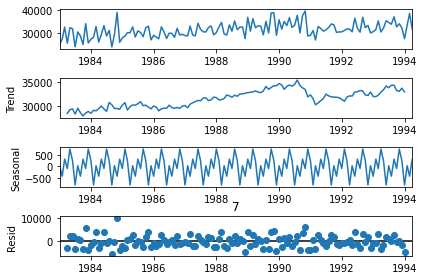

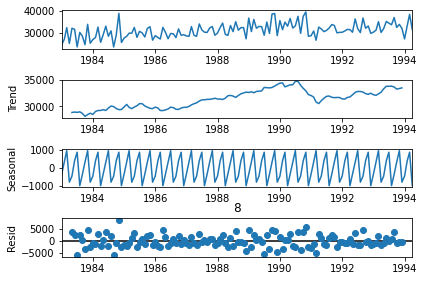

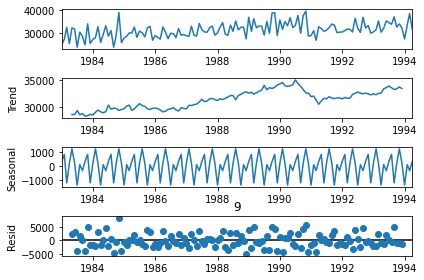

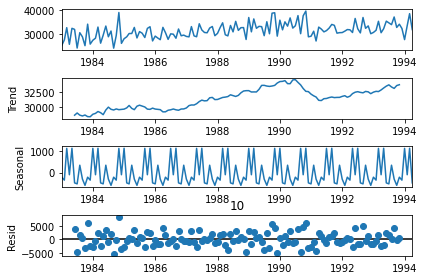

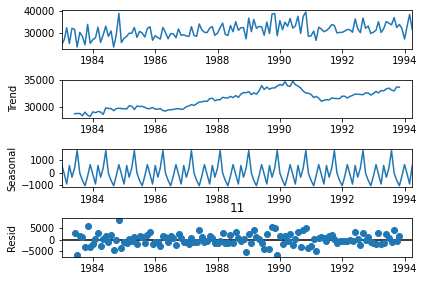

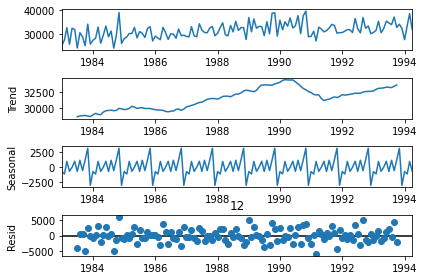

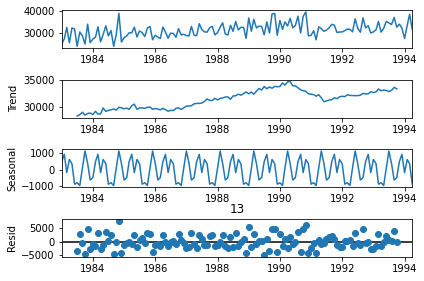

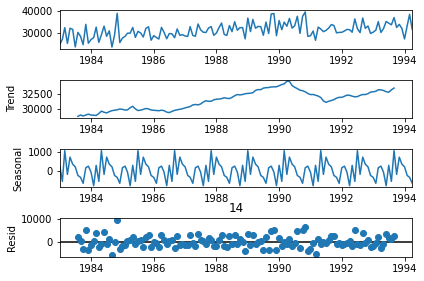

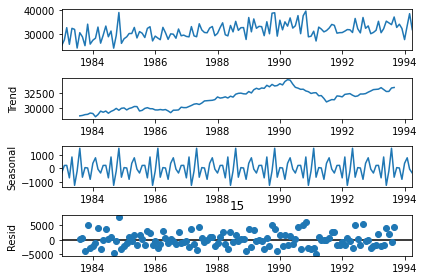

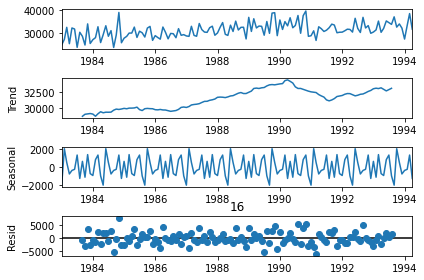

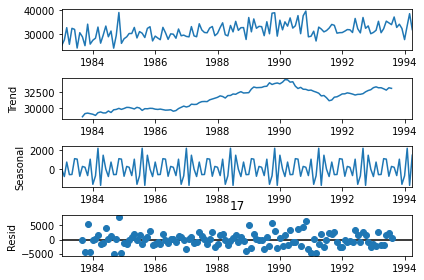

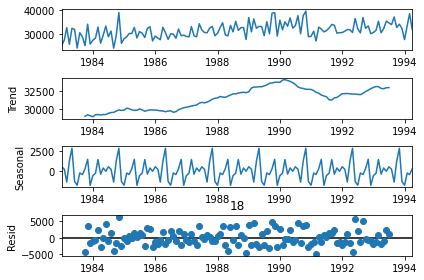

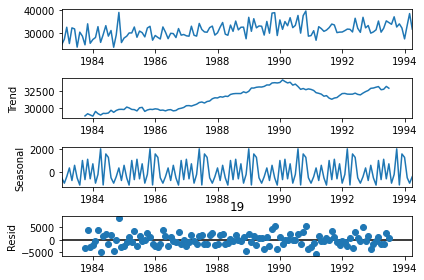

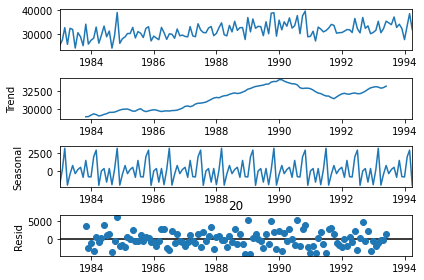

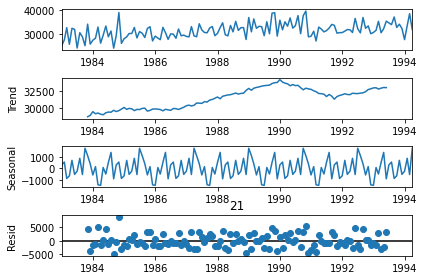

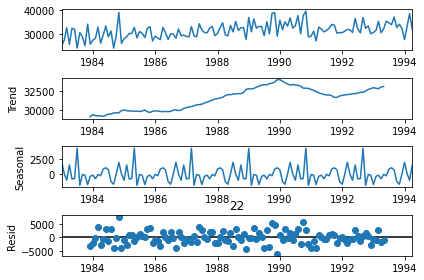

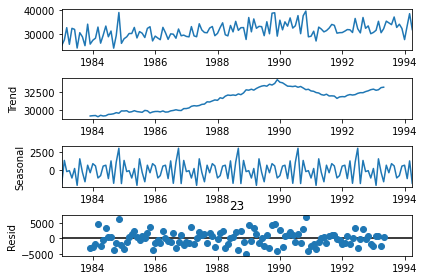

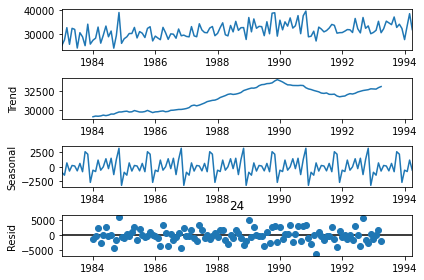

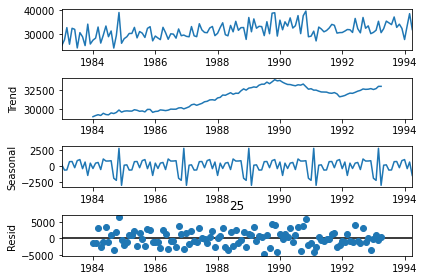

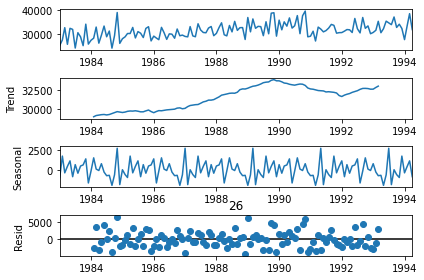

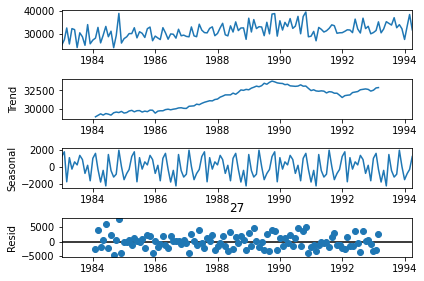

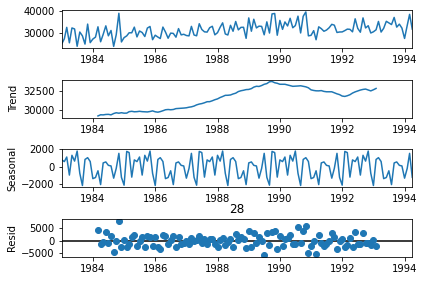

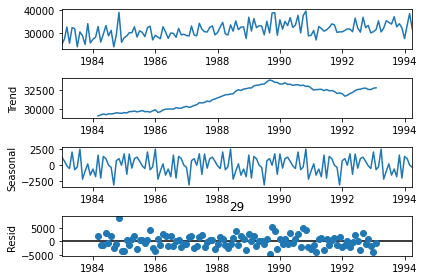

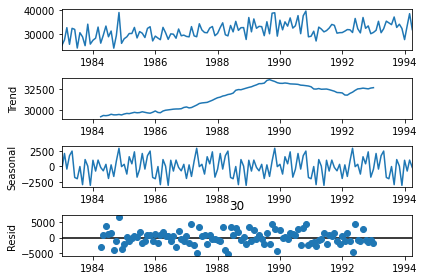

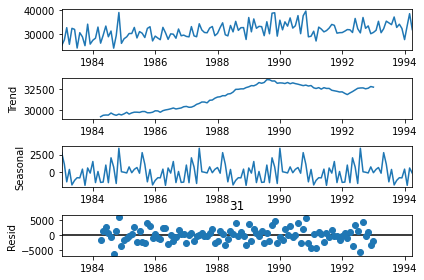

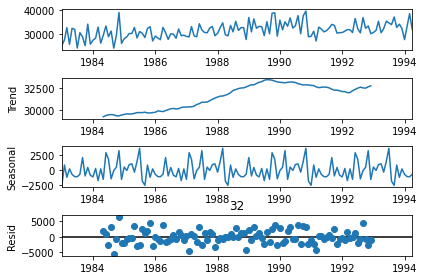

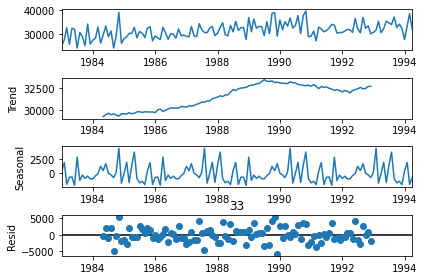

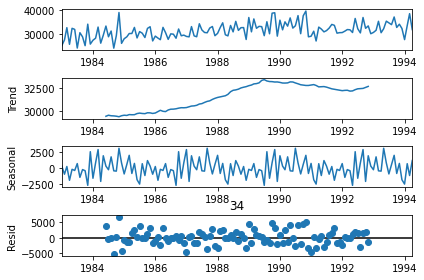

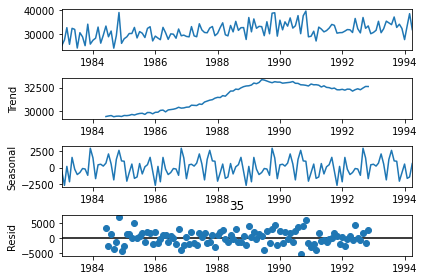

In [ ]:
for num in range(1, 36):
  seasonal_decompose(water, period=num).plot()
  plt.title(f'{num}')
  plt.show();
  print('\n')

In [ ]:
# Perform Dickey-Fuller test
adfuller(water)

(-1.334673861894635,
 0.6131635216111303,
 11,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 2270.6336183231397)

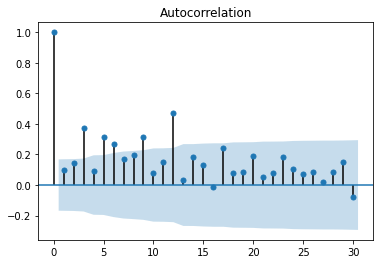

In [ ]:
plot_acf(water, lags=30)
plt.show();

The ACF plot of time series data with some seasonality, and whose adfuller test's p-value is insignificant, is quite different from those of a non-seasonal time series data with same p-value behaviour.

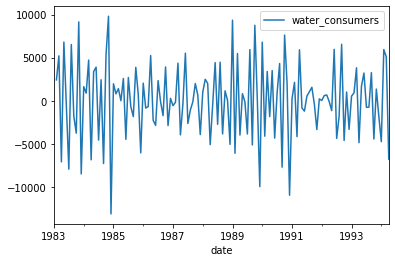

In [ ]:
water.diff().plot()
plt.show();

In [ ]:
adfuller(water.diff().dropna())

(-7.329426914095865,
 1.138134848009068e-10,
 10,
 124,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 2251.229010451765)

Stationary

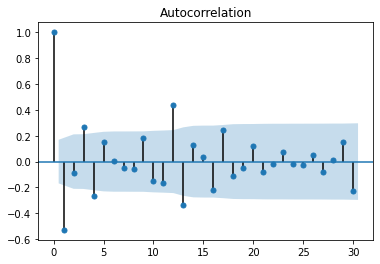

In [ ]:
plot_acf(water.diff().dropna(), lags=30)
plt.show();

Shows we have correlated residue and therefore we can't fit a good model like this. If we fit a model to it we won't be using all the information in the data and therefore not making the best prediction possible.

Normally, we detrend a time series by taking the difference, but when a time series seem seasonal, we use a rolling mean to detrend it.

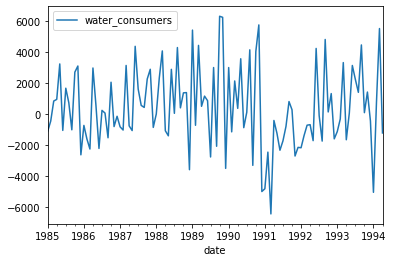

In [ ]:
# Subtract the rolling mean
water_2 = water - water.rolling(25).mean()

# Drop the NaN values
water_2 = water_2.dropna()

water_2.plot()
plt.show();

In [ ]:
adfuller(water_2)

(-1.6279602357815786,
 0.46855858665961697,
 11,
 100,
 {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349},
 1825.0896556531422)

Not statonary

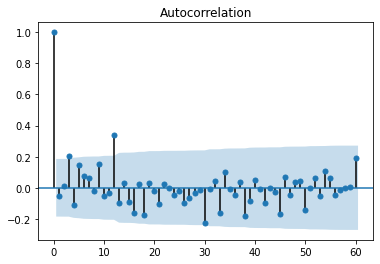

In [ ]:
plot_acf(water_2, lags=60)
plt.show();

period obtained after the detrend is 12.

If we have a seasonal time series with a trend, to get the time series to be stationary, we first detrend by taking a difference. Afterwards, if there is a strong seasonality, we apply to the detrended series a difference based on the seasonal cycle/period.

To find the order parameters of the non-seasonal part, we plot the ACF and PACF of the detrended data then apply the principle for choosing model order parameter. 

To find the order parameters of the seasonal part, we plot the ACF and PACF of the cycle-difference of the detrended data then apply the principle for choosing model order parameter. The lag parameter in the plot is a list of lags which are multiples of the period.

**Automated Model Selection**

To automate our search, we use pmdarima

In [ ]:
# Import pmdarima as pm
import pmdarima as pm

Sometimes, our differencing may be seasonal, or non-seasonal, or both. A rule of thumb is never to apply more than one differencing for either, or more than two differencing which represent both types of differencing.

Seasonality can be additive or multiplicative. 

Additive series = trend + season. here we proceed with the usual method. 

Multiplicative series = trend x season. Here the amplitude of the season changes with time, therefore we use a log transform to make the series additive before proceeding with the usual steps.